# COURSE: A deep understanding of deep learning
## SECTION: Gradient descent
### LECTURE: Gradient descent in 1D
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/deeplearning_x/?couponCode=202401

In [9]:
# import all necessary modules
import numpy as np
import matplotlib.pyplot as plt

import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

import math
import sympy
import sympy.plotting.plot as symplot

# First Code Challenge - different function and deriv

# Gradient descent in 1D

In [30]:
#x =sympy.Symbol('x', real=True)
x =sympy.symbols('x')

fx = sympy.cos(x * 2 * sympy.pi) + x ** 2
df_dx = sympy.diff(fx,x)


print(fx)
print(df_dx)


x**2 + cos(2*pi*x)
2*x - 2*pi*sin(2*pi*x)


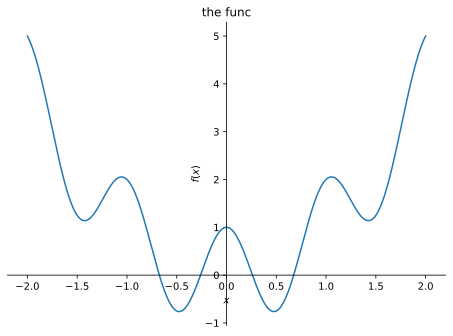

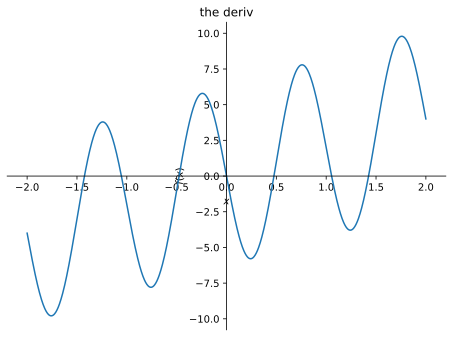

In [21]:
# plot the function and its derivative

# define a range for x
#x = np.linspace(-2,2,2001)

# plotting
symplot(fx,(x,-2,2),title='the func')
symplot(df_dx,(x,-2,2), title='the deriv')

# plt.xlim(x[[0,-1]])
# plt.grid()
# plt.xlabel('x')
# plt.ylabel('fx(x)')
# plt.legend(['y','dy'])
plt.show()

In [28]:
print(fx.subs(x,1))
print(df_dx.subs(x,0))


2
0


In [ ]:
# random starting point
localmin = np.random.choice(x,1)
print(localmin)

# learning parameters
learning_rate = .01
training_epochs = 100

# run through training
for i in range(training_epochs):
  grad = df_dx(localmin)
  localmin = localmin - learning_rate*grad

localmin

In [ ]:
# plot the results

plt.plot(x,fx(x), x,deriv(x))
plt.plot(localmin,deriv(localmin),'ro')
plt.plot(localmin,fx(localmin),'ro')

plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['f(x)','df','f(x) min'])
plt.title('Empirical local minimum: %s'%localmin[0])
plt.show()

# Store the model parameters and outputs on each iteration

In [ ]:
# random starting point
localmin = np.random.choice(x,1)

# learning parameters
learning_rate = .01
training_epochs = 100

# run through training and store all the results
modelparams = np.zeros((training_epochs,2))
for i in range(training_epochs):
  grad = deriv(localmin)
  localmin = localmin - learning_rate*grad
  modelparams[i,0] = localmin[0]
  modelparams[i,1] = grad[0]


In [ ]:
# plot the gradient over iterations

fig,ax = plt.subplots(1,2,figsize=(12,4))

for i in range(2):
  ax[i].plot(modelparams[:,i],'o-')
  ax[i].set_xlabel('Iteration')
  ax[i].set_title(f'Final estimated minimum: {localmin[0]:.5f}')

ax[0].set_ylabel('Local minimum')
ax[1].set_ylabel('Derivative')

plt.show()

# Additional explorations

In [ ]:
# 1) Most often in DL, the model trains for a set number of iterations, which is what we do here. But there are other ways
#    of defining how long the training lasts. Modify the code so that training ends when the derivative is smaller than 
#    some threshold, e.g., 0.1. Make sure your code is robust for negative derivatives.
# 
# 2) Does this change to the code produce a more accurate result? What if you change the stopping threshold?
# 
# 3) Can you think of any potential problems that might arise when the stopping criterion is based on the derivative 
#    instead of a specified number of training epochs?
# 